<a href="https://colab.research.google.com/github/sunandhini96/school_of_AI-Assignment10/blob/main/sunandini_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## clone the github repo

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 294 (delta 95), reused 135 (delta 73), pack-reused 108
Receiving objects: 100% (294/294), 87.92 KiB | 10.99 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!pip install einops
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from Models import *
from Models.vit import *

In [5]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import torchvision

In [6]:
DATA_DIR='./data'

In [7]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device:", DEVICE)

device: cuda


## summary of all classes

## Attention class

In [8]:
summary(model=Attention(dim=32,shape=(16,16), heads = 4, dim_head = 8, dropout = 0.),input_size=(128,257,32),col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Attention (Attention)                    [128, 257, 32]       [128, 257, 32]       --                   True
├─Conv1d (to_keys)                       [128, 32, 257]       [128, 32, 257]       1,024                True
├─Conv1d (to_values)                     [128, 32, 257]       [128, 32, 257]       1,024                True
├─Conv1d (to_queries)                    [128, 32, 257]       [128, 32, 257]       1,024                True
├─Softmax (attend)                       [128, 4, 257, 257]   [128, 4, 257, 257]   --                   --
├─Sequential (to_out)                    [128, 257, 32]       [128, 257, 32]       --                   True
│    └─Linear (0)                        [128, 257, 32]       [128, 257, 32]       1,056                True
│    └─Dropout (1)                       [128, 257, 32]       [128, 257, 32]       --                   --
Total params: 4,12

##  Summary of feed forward class

In [9]:
summary(model=FeedForward(dim=32,hidden_dim=32),input_size=(128,257,32),col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
FeedForward (FeedForward)                [128, 257, 32]       [128, 257, 32]       --                   True
├─Sequential (net)                       [128, 32, 257]       [128, 32, 257]       --                   True
│    └─Conv1d (0)                        [128, 32, 257]       [128, 32, 257]       1,056                True
│    └─GELU (1)                          [128, 32, 257]       [128, 32, 257]       --                   --
│    └─Dropout (2)                       [128, 32, 257]       [128, 32, 257]       --                   --
│    └─Conv1d (3)                        [128, 32, 257]       [128, 32, 257]       1,056                True
│    └─Dropout (4)                       [128, 32, 257]       [128, 32, 257]       --                   --
Total params: 2,112
Trainable params: 2,112
Non-trainable params: 0
Total mult-adds (M): 69.48
Input size (MB): 4.21
Forward/back

## Summary of Transformer block

In [10]:
summary(model=Transformer(dim=32,depth=4, heads=4, dim_head=8, mlp_dim=128,shape=(16,16), dropout = 0.),input_size=(128,257,32),col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Transformer (Transformer)                     [128, 257, 32]       [128, 257, 32]       --                   True
├─ModuleList (layers)                         --                   --                   --                   True
│    └─ModuleList (0)                         --                   --                   --                   True
│    │    └─PreNorm (0)                       [128, 257, 32]       [128, 257, 32]       4,192                True
│    │    └─PreNorm (1)                       [128, 257, 32]       [128, 257, 32]       8,416                True
│    └─ModuleList (1)                         --                   --                   --                   True
│    │    └─PreNorm (0)                       [128, 257, 32]       [128, 257, 32]       4,192                True
│    │    └─PreNorm (1)                       [128, 257, 32]       [128, 257, 32]  

In [11]:
NUM_CLASSES, IMAGE_SIZE = 10, 32
patch_size=2
mlp_dim=128
dim=32
depth=4
heads=4

model = ViT(image_size=IMAGE_SIZE,patch_size=2,num_classes=10,dim=32, depth=4, heads=4, mlp_dim=128, pool = 'cls', channels = 3, dim_head = 8, dropout = 0., emb_dropout = 0.)

In [12]:
model.to(DEVICE)

ViT(
  (to_patch_embedding): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GELU(approximate='none')
    (2): Conv2d(12, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): Flatten(start_dim=2, end_dim=3)
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (attend): Softmax(dim=-1)
            (to_keys): Conv1d(32, 32, kernel_size=(1,), stride=(1,), bias=False)
            (to_queries): Conv1d(32, 32, kernel_size=(1,), stride=(1,), bias=False)
            (to_values): Conv1d(32, 32, kernel_size=(1,), stride=(1,), bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=32, out_features=32, bias=True)
              (1): Dropout(p=0.0, inplace=False)
            )
            (out1): Flatten(start_dim=1, end_dim=2)


## Summary of ViT model

In [13]:
# Print a summary using torchinfo (uncomment for actual output)
shape=(16,16)
summary(model=model, 
        input_size=(128, 3, 32, 32), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                          [128, 3, 32, 32]     [128, 10]            --                   True
├─Sequential (to_patch_embedding)                  [128, 3, 32, 32]     [128, 32, 256]       --                   True
│    └─Conv2d (0)                                  [128, 3, 32, 32]     [128, 12, 32, 32]    336                  True
│    └─GELU (1)                                    [128, 12, 32, 32]    [128, 12, 32, 32]    --                   --
│    └─Conv2d (2)                                  [128, 12, 32, 32]    [128, 32, 16, 16]    1,568                True
│    └─Flatten (3)                                 [128, 32, 16, 16]    [128, 32, 256]       --                   --
├─Dropout (dropout)                                [128, 257, 32]       [128, 257, 32]       --                   --
├─Transformer (transformer)                      

In [14]:
print("Number of parameters: {:,}".format(sum(p.numel() for p in model.parameters())))

Number of parameters: 53,850


In [15]:
IMAGE_SIZE = 32

NUM_CLASSES = 10
NUM_WORKERS = 8
BATCH_SIZE = 128
EPOCHS = 25

LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-1

cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.75, 1.0), ratio=(1.0, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandAugment(num_ops=1, magnitude=8),
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std),
    transforms.RandomErasing(p=0.25)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std)
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


In [17]:
import time

clip_norm = True
lr_schedule = lambda t: np.interp([t], [0, EPOCHS*2//5, EPOCHS*4//5, EPOCHS], 
                                  [0, 0.01, 0.01/20.0, 0])[0]

model = nn.DataParallel(model, device_ids=[0]).cuda()
opt = optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
scaler = torch.cuda.amp.GradScaler()

for epoch in range(EPOCHS):
    start = time.time()
    train_loss, train_acc, n = 0, 0, 0
    for i, (X, y) in enumerate(trainloader):
        model.train()
        X, y = X.cuda(), y.cuda()

        lr = lr_schedule(epoch + (i + 1)/len(trainloader))
        opt.param_groups[0].update(lr=lr)

        opt.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(X)
            loss = criterion(output, y)

        scaler.scale(loss).backward()
        if clip_norm:
            scaler.unscale_(opt)
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        scaler.step(opt)
        scaler.update()
        
        train_loss += loss.item() * y.size(0)
        train_acc += (output.max(1)[1] == y).sum().item()
        n += y.size(0)
        
    model.eval()
    test_acc, m = 0, 0
    with torch.no_grad():
        for i, (X, y) in enumerate(testloader):
            X, y = X.cuda(), y.cuda()
            with torch.cuda.amp.autocast():
                output = model(X)
            test_acc += (output.max(1)[1] == y).sum().item()
            m += y.size(0)

    print(f'ViT : Epoch: {epoch} | Train Acc: {train_acc/n:.4f}, Test Acc: {test_acc/m:.4f}, Time: {time.time() - start:.1f}, lr: {lr:.6f}')


ViT : Epoch: 0 | Train Acc: 0.1984, Test Acc: 0.3462, Time: 68.7, lr: 0.001000
ViT : Epoch: 1 | Train Acc: 0.3463, Test Acc: 0.4460, Time: 80.2, lr: 0.002000
ViT : Epoch: 2 | Train Acc: 0.4017, Test Acc: 0.4656, Time: 73.3, lr: 0.003000
ViT : Epoch: 3 | Train Acc: 0.4268, Test Acc: 0.4941, Time: 74.5, lr: 0.004000
ViT : Epoch: 4 | Train Acc: 0.4479, Test Acc: 0.5144, Time: 69.6, lr: 0.005000
ViT : Epoch: 5 | Train Acc: 0.4737, Test Acc: 0.5311, Time: 71.1, lr: 0.006000
ViT : Epoch: 6 | Train Acc: 0.4909, Test Acc: 0.5647, Time: 70.8, lr: 0.007000
ViT : Epoch: 7 | Train Acc: 0.5125, Test Acc: 0.5602, Time: 69.4, lr: 0.008000
ViT : Epoch: 8 | Train Acc: 0.5286, Test Acc: 0.6031, Time: 69.5, lr: 0.009000
ViT : Epoch: 9 | Train Acc: 0.5397, Test Acc: 0.5763, Time: 71.0, lr: 0.010000
ViT : Epoch: 10 | Train Acc: 0.5510, Test Acc: 0.6205, Time: 70.0, lr: 0.009050
ViT : Epoch: 11 | Train Acc: 0.5711, Test Acc: 0.6159, Time: 69.4, lr: 0.008100
ViT : Epoch: 12 | Train Acc: 0.5857, Test Acc: 0.6

Files already downloaded and verified
Image 0: predicted label=4, true label=3


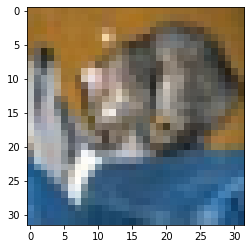

Image 1: predicted label=3, true label=8


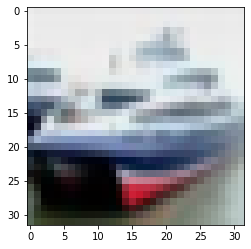

Image 2: predicted label=0, true label=8


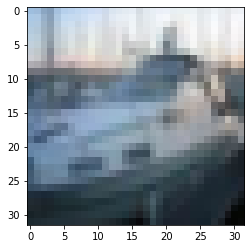

Image 3: predicted label=2, true label=1


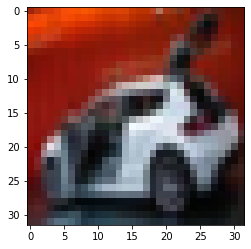

Image 4: predicted label=3, true label=1


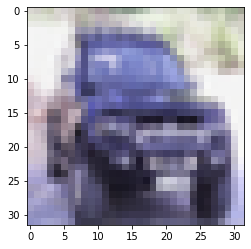

Image 5: predicted label=5, true label=9


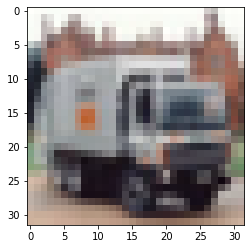

Image 6: predicted label=3, true label=9


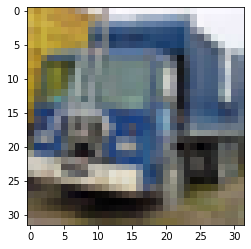

Image 7: predicted label=3, true label=8


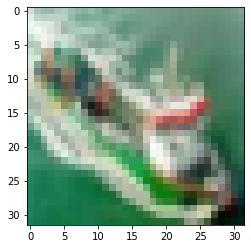

In [25]:
# Load the model
model = model



test_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(cifar10_mean, cifar10_std)
])


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

# Create a data loader for the test dataset
test_loader = testloader

# Evaluate the model on the test dataset
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images=images.cuda()
        labels = labels.cuda()
        #print(labels)
        output = model(images)
        test_loss += F.nll_loss(output, labels, reduction='sum').item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels.view_as(pred)).sum().item()

# Find the misclassified images
misclassified_indices = np.where(pred.cpu().numpy().flatten() != labels.cpu().numpy())[0]
misclassified_images = [testset[i][0] for i in misclassified_indices]
misclassified_labels = [testset[i][1] for i in misclassified_indices]
misclassified_predictions = [pred[i][0].item() for i in misclassified_indices]

# Print the misclassified images and their predicted and true labels
for i in range(len(misclassified_images)):
    print(f"Image {i}: predicted label={misclassified_predictions[i]}, true label={misclassified_labels[i]}")
    plt.imshow(np.transpose(misclassified_images[i].numpy(), (1, 2, 0)))# np.transpose(misclassified_images[i].numpy(), (1, 2, 0))
    plt.show()


In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the Vision Transformer model
model = model
model.eval()

# Load the CIFAR-10 dataset
testset = testset
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
import torch.nn.functional as F
from torch.autograd import Variable

def generate_gradcam(model, image, class_idx):
    # Set the model to evaluation mode
    model.eval()

    # Convert the image to a tensor and normalize it
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    #print("")
    image_tensor = transform(image).unsqueeze(0)

    # Forward pass through the model
    features = model.features(image_tensor)
    output = model.logits(features)
    output = F.softmax(output, dim=1)

    # Compute the gradients of the output with respect to the features
    one_hot = torch.zeros_like(output)
    one_hot[0][class_idx] = 1
    one_hot = one_hot * output
    one_hot = one_hot.sum(dim=1, keepdim=True)
    features = features.clone().detach().requires_grad_(True)
    one_hot.backward(gradient=one_hot, retain_graph=True)

    # Compute the weights for each feature map
    gradients = features.grad
    weights = F.adaptive_avg_pool2d(gradients, 1)
    weights = torch.clamp(weights, min=0)
    weights = weights / (torch.sum(weights) + 1e-8)

    # Compute the GradCAM image
    gradcam = torch.sum(features * weights, dim=1, keepdim=True)
    gradcam = F.relu(gradcam)
    gradcam = F.interpolate(gradcam, size=(image.shape[0], image.shape[1]), mode='bilinear', align_corners=False)
    gradcam = gradcam.squeeze().numpy()

    return gradcam


# Get the misclassified images
misclassified = []
with torch.no_grad():
    for i, (image, label) in enumerate(testset):
        image = np.array(image)
        print("size",torch.unsqueeze(torchvision.transforms.ToTensor()(image), 0).permute(0,2,1,3).shape)
        output = model(torch.unsqueeze(torchvision.transforms.ToTensor()(image), 0).permute(0,2,1,3))#torch.unsqueeze(
        print("output",output)
        pred_label = torch.argmax(output)
        if pred_label != label:
            misclassified.append((image, label, pred_label))
        if len(misclassified) == 10:
            break

# Plot the misclassified images and their GradCAMs
# Plot the misclassified images and their GradCAMs
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for i, (image, label, pred_label) in enumerate(misclassified):
    # Generate the GradCAM image for the predicted class
    print("image",image.shape)
    gradcam = generate_gradcam(model, image, pred_label)

    # Convert the image and GradCAM to numpy arrays and rescale them
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (224, 224))
    image = (image * 0.5) + 0.5
    gradcam = np.uint8(255 * gradcam)

    # Overlay the GradCAM on the image
    overlay = cv2.applyColorMap(gradcam, cv2.COLORMAP_JET)
    overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    heatmap = cv2.addWeighted(image, 0.5, overlay, 0.5, 0)

    # Plot the image and GradCAM
    row = i // 2
    col = i % 2
    axs[row, col].imshow(image)
    axs[row, col].set_title(f"True Label: {testset.classes[label]}\nPredicted Label: {testset.classes[pred_label]}")
    axs[row, col].axis('off')
    axs[row+5, col].imshow(heatmap)
    axs[row+5, col].set_title("GradCAM")
    axs[row+5, col].axis('off')

plt.show()
